In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import svm

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False) 

xtrain,  xtest,  ytrain,  ytest  =  train_test_split(mnist.data,  mnist.target, 
train_size=0.7)

In [4]:
classifier = svm.SVC(probability=True)
classifier.fit(xtrain[:10000], ytrain[:10000])

SVC(probability=True)

In [5]:
print(f'prediction of 100 first examples :\n {classifier.predict(xtest[:100])}\n')
print(f'proba of 10 first examples :\n{classifier.predict_proba(xtest[:10])}\n')
print(f'Score on all test set = {classifier.score(xtest, ytest)}\n')

prediction of 100 first examples :
 ['0' '7' '4' '8' '7' '6' '4' '7' '0' '8' '0' '9' '1' '7' '1' '7' '7' '1'
 '2' '6' '1' '0' '2' '8' '1' '3' '9' '9' '3' '1' '7' '4' '5' '1' '9' '5'
 '0' '0' '2' '1' '7' '7' '2' '3' '3' '9' '7' '6' '1' '1' '6' '4' '0' '3'
 '2' '8' '1' '6' '3' '7' '8' '1' '1' '6' '7' '1' '7' '4' '5' '4' '6' '5'
 '0' '3' '2' '2' '6' '6' '1' '3' '8' '7' '2' '1' '5' '1' '7' '8' '1' '1'
 '9' '2' '1' '1' '9' '7' '3' '3' '9' '4']

proba of 10 first examples :
[[7.24089105e-01 9.04974646e-04 7.05386754e-03 1.04003629e-01
  5.99526163e-04 1.32948100e-01 1.24129871e-03 1.01485753e-02
  1.64505935e-02 2.56033026e-03]
 [3.87117881e-04 2.96982026e-04 2.66846651e-03 1.21161330e-02
  2.33557620e-04 8.37074815e-04 1.00879673e-04 9.82176796e-01
  1.70220698e-04 1.01277151e-03]
 [6.80535055e-04 9.43156343e-04 9.50198587e-03 1.73611025e-03
  9.36040509e-01 2.54924410e-03 1.11601718e-02 1.33744280e-02
  2.47301794e-03 2.15408418e-02]
 [4.17665096e-05 3.46712546e-06 7.14378459e-05 7.7799646

In [6]:
clsvm = svm.SVC(kernel='linear',probability=True)
clsvm.fit(xtrain[:1000], ytrain[:1000])

SVC(kernel='linear', probability=True)

In [7]:
print(f'prediction of 100 first examples :\n {clsvm.predict(xtest[:100])}\n')
print(f'proba of 10 first examples :\n{clsvm.predict_proba(xtest[:10])}\n')
print(f'Score on all test set = {clsvm.score(xtest, ytest)}\n')

prediction of 100 first examples :
 ['5' '7' '4' '8' '7' '6' '4' '7' '0' '4' '0' '9' '1' '7' '1' '7' '7' '1'
 '2' '6' '1' '0' '2' '8' '1' '3' '9' '9' '3' '1' '7' '4' '5' '1' '9' '5'
 '0' '0' '2' '1' '7' '7' '2' '3' '3' '9' '7' '6' '1' '1' '6' '4' '0' '3'
 '2' '7' '1' '6' '3' '7' '8' '1' '1' '6' '7' '1' '7' '4' '5' '9' '6' '5'
 '0' '3' '2' '2' '6' '6' '1' '3' '8' '7' '2' '1' '5' '1' '7' '8' '1' '1'
 '9' '2' '1' '1' '4' '7' '3' '3' '9' '4']

proba of 10 first examples :
[[2.63409746e-01 1.98683447e-02 7.75389139e-02 8.08336671e-02
  2.48795287e-02 1.94403259e-01 3.15740175e-02 6.12771102e-02
  2.06017826e-01 4.01975862e-02]
 [2.57557774e-03 3.19488002e-03 7.21737036e-03 7.71010981e-02
  6.74510286e-03 3.32983142e-02 1.80834234e-03 8.26760132e-01
  6.69578873e-03 3.46033933e-02]
 [8.95570584e-03 4.56122852e-03 8.28057763e-02 7.88438875e-03
  3.34337123e-01 2.95487868e-02 3.89259691e-02 2.90730225e-01
  5.17904158e-02 1.50460380e-01]
 [3.17793254e-03 2.26517860e-03 4.90090656e-03 1.2570073

In [77]:
clsvm = svm.SVC(kernel='linear',probability=True)
clsvm.fit(xtrain[:1000], ytrain[:1000])

kernel_list = ['linear', 'poly', 'rbf',
'sigmoid']

scores = dict.fromkeys(kernel_list,0)

for kernel in kernel_list:
    clsvm = svm.SVC(kernel=kernel,probability=True)
    clsvm.fit(xtrain[:1000], ytrain[:1000])
    scores[kernel] = clsvm.score(xtest, ytest)

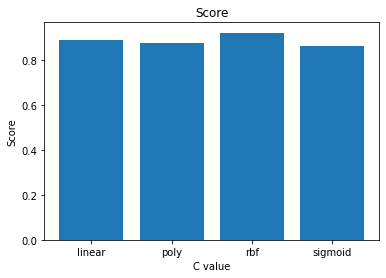

In [78]:
kernel_names = list(scores.keys())
kernel_scores = list(scores.values())

plt.bar(range(len(scores)), kernel_scores, tick_label=kernel_names)
plt.title("Score")
plt.ylabel("Score")
plt.xlabel("C value")
plt.show()

In [79]:
C_values = np.linspace(0.1,1,5)

kernel_list = ['linear', 'poly', 'rbf',
'sigmoid']

scores = dict.fromkeys(kernel_list,[])

for kernel in kernel_list:
    scores_C = []
    for C in C_values:
        clsvm = svm.SVC(kernel=kernel,probability=True, C=C)
        clsvm.fit(xtrain[:1000], ytrain[:1000])
        scores_C.append(clsvm.score(xtest, ytest))
    scores[kernel] = scores_C

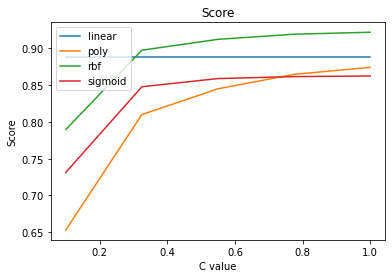

In [80]:
for kernel in kernel_list:
    plt.plot(C_values,scores[kernel],label = kernel)
plt.legend(loc="upper left")
plt.title("Score")
plt.ylabel("Score")
plt.xlabel("C value")
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, clsvm.predict(xtest))
cm

array([[2015,    0,   23,    9,    1,   49,   37,    3,   20,    2],
       [   0, 2227,    5,    5,    3,   18,    3,    2,   20,    1],
       [  36,   66, 1628,   26,   42,   15,   59,   47,   86,   14],
       [  13,   39,   64, 1695,    1,  173,   18,   29,   99,   35],
       [   5,   14,   24,    0, 1798,    2,   22,    3,   20,  131],
       [  46,   76,   12,  143,   29, 1465,   52,    6,   42,   19],
       [  26,   13,   73,    0,   12,   42, 1902,    5,    8,    0],
       [  10,   34,   29,    4,   49,    4,    0, 1933,   10,  103],
       [  24,   97,   27,   54,   24,   95,   34,   16, 1727,   52],
       [  16,   25,   12,   20,  122,   17,    1,   93,   33, 1717]],
      dtype=int64)

In [65]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import time

C_values = np.linspace(0.1,1,5)

kernel_list = ['linear', 'poly', 'rbf',
'sigmoid']

scores = dict.fromkeys(kernel_list,[])

for kernel in kernel_list:
    
    precisions = []
    recalls = []
    errors = []
    training_times = []
    
    for C in C_values:
        
        clsvm = svm.SVC(kernel=kernel,probability=True, C=C)
        
        training_start = time.time()
        clsvm.fit(xtrain[:5000], ytrain[:5000])
        training_stop = time.time()
        
        number_tests = 100
        predictions = clsvm.predict(xtest[:number_tests])
        
        precisions.append(precision_score(ytest[:number_tests], predictions, average='macro'))
        recalls.append(recall_score(ytest[:number_tests], predictions, average='macro'))
        errors.append(1 - clsvm.score(xtest[:number_tests], ytest[:number_tests]))
        training_times.append(training_stop - training_start)
        
    scores[kernel] = {"precisions" : precisions,
                      "recalls" : recalls,
                      "errors" : errors,
                      "training time" : training_times}

In [67]:
scores['linear']['precisions']

[0.9555555555555557,
 0.9555555555555557,
 0.9555555555555557,
 0.9555555555555557,
 0.9555555555555557]

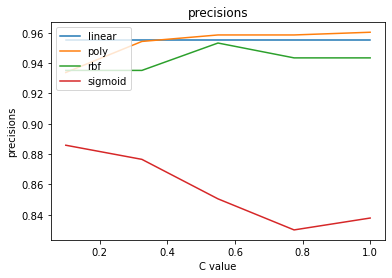

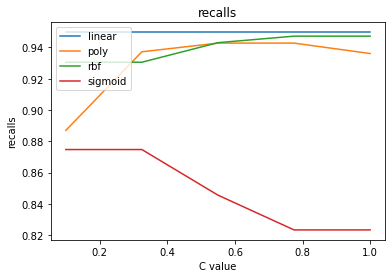

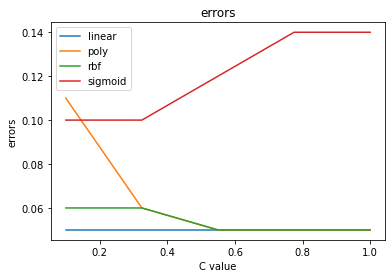

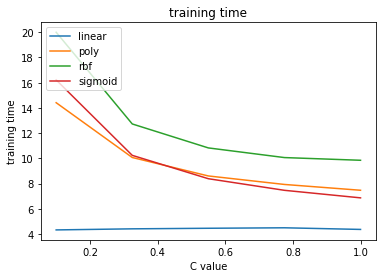

In [66]:
graphs = ["precisions", "recalls", "errors","training time"]

for graph in graphs:
    for kernel in kernel_list:
        plt.plot(C_values,scores[kernel][graph], label = kernel)
    plt.legend(loc="upper left")
    plt.title(graph)
    plt.ylabel(graph)
    plt.xlabel("C value")
    plt.show()

In [72]:

C_values = np.linspace(0.1,1,5)

kernel_list = ['linear', 'poly', 'rbf',
'sigmoid']

scores = dict.fromkeys(kernel_list,[])

for kernel in kernel_list:
    
    precisions = []
    recalls = []
    errors = []
    training_times = []
    
    for C in C_values:
        
        clsvm = svm.SVC(kernel=kernel,probability=True, C=C)
        
        training_start = time.time()
        clsvm.fit(xtrain[:1000], ytrain[:1000])
        training_stop = time.time()
        
        number_tests = 100
        predictions = clsvm.predict(xtest)
        
        precisions.append(precision_score(ytest, predictions, average='macro'))
        recalls.append(recall_score(ytest, predictions, average='macro'))
        errors.append(1 - clsvm.score(xtest, ytest))
        training_times.append(training_stop - training_start)
        
    scores[kernel] = {"precisions" : precisions,
                      "recalls" : recalls,
                      "errors" : errors,
                      "training time" : training_times}

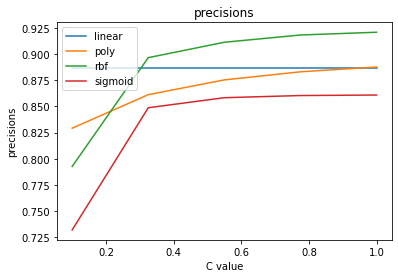

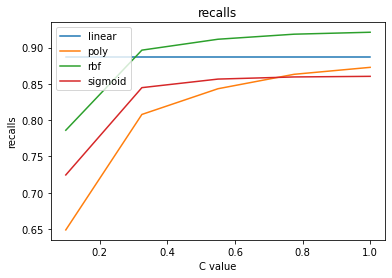

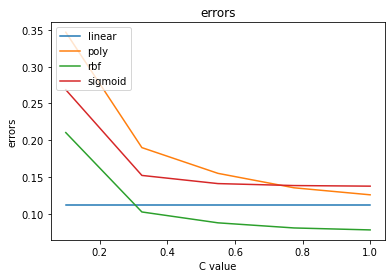

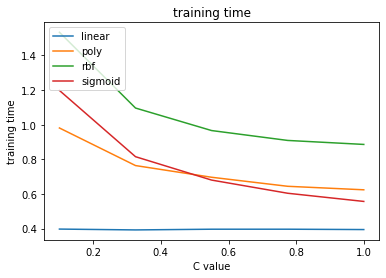

In [73]:
graphs = ["precisions", "recalls", "errors","training time"]

for graph in graphs:
    for kernel in kernel_list:
        plt.plot(C_values,scores[kernel][graph], label = kernel)
    plt.legend(loc="upper left")
    plt.title(graph)
    plt.ylabel(graph)
    plt.xlabel("C value")
    plt.show()

In [14]:
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier
from sklearn import svm

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import zero_one_loss

import time 
import pickle

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='latin1')
    return data

def splitSetRandom(data,labels, train_size):
    random_indexes = np.random.randint(labels.size, size=labels.size)
    
    X_train = np.array([data[i] for i in random_indexes[:train_size]])
    X_test = np.array([data[i] for i in random_indexes[train_size:]])
    y_train = np.array([labels[i] for i in random_indexes[:train_size]])
    y_test =  np.array([labels[i] for i in random_indexes[train_size:]])
    return X_train,X_test,y_train,y_test

# Divide into training and testing
X_train,X_test,y_train,y_test = splitSetRandom(data = mnist.data, labels = mnist.target, train_size = 49000)


In [15]:
def run_knn(X_train,X_test,y_train,y_test):
    n_neighbors = 3
    model = neighbors.KNeighborsClassifier(n_neighbors)
    start_t = time.time()
    model.fit(X_train,y_train)
    training_time = time.time()-start_t
    prediction = model.predict(X_test)
    precision = precision_score(y_test,prediction,average ='micro')
    recall = recall_score(y_test,prediction,average = 'micro')
    error = zero_one_loss(y_test,prediction)
    return precision,recall,error,training_time

def run_mlp(X_train,X_test,y_train,y_test):
    hidden_layers_neurons_tuple = (91, 92, 23, 182, 87)
    model = MLPClassifier(hidden_layer_sizes = hidden_layers_neurons_tuple,verbose=True)   
    start_t = time.time()
    model.fit(X_train,y_train)
    training_time = time.time()-start_t
    prediction = model.predict(X_test)
    precision = precision_score(y_test,prediction,average ='micro')
    recall = recall_score(y_test,prediction,average = 'micro')
    error = zero_one_loss(y_test,prediction)
    return precision,recall,error,training_time

def run_svm(X_train,X_test,y_train,y_test):
    C = 1
    model = svm.SVC(kernel="rbf",probability=True, C=C)    
    start_t = time.time()
    model.fit(X_train,y_train)
    training_time = time.time()-start_t
    prediction = model.predict(X_test)
    precision = precision_score(y_test,prediction,average ='micro')
    recall = recall_score(y_test,prediction,average = 'micro')
    error = zero_one_loss(y_test,prediction)
    return precision,recall,error,training_time

In [16]:
size_train_list = [500,1000,5000,10000,20000]

precisions_knn = []
recalls_knn= []
errors_knn= []
training_time_knn= []

precisions_mlp = []
recalls_mlp= []
errors_mlp= []
training_time_mlp= []

precisions_svm = []
recalls_svm= []
errors_svm= []
training_time_svm= []

for size_train in size_train_list:
    # knn
    precision,recall,error,training_time = run_knn(X_train[:size_train],X_test,y_train[:size_train],y_test)
    precisions_knn.append(precision)
    recalls_knn.append(recall)
    errors_knn.append(error)
    training_time_knn.append(training_time)
    
    precision,recall,error,training_time = run_mlp(X_train[:size_train],X_test,y_train[:size_train],y_test)
    precisions_mlp.append(precision)
    recalls_mlp.append(recall)
    errors_mlp.append(error)
    training_time_mlp.append(training_time)
      
    precision,recall,error,training_time = run_svm(X_train[:size_train],X_test,y_train[:size_train],y_test)
    precisions_svm.append(precision)
    recalls_svm.append(recall)
    errors_svm.append(error)
    training_time_svm.append(training_time)
    
pickle.dump({"precisions":precisions_knn,"recalls":recalls_knn,"errors":errors_knn,"training_time":training_time_knn}, open( "results/knn_results.p", "wb" )) # Save results

pickle.dump({"precisions":precisions_mlp,"recalls":recalls_mlp,"errors":errors_mlp,"training_time":training_time_mlp}, open( "results/mlp_results.p", "wb" )) # Save results

pickle.dump({"precisions":precisions_svm,"recalls":recalls_svm,"errors":errors_svm,"training_time":training_time_svm}, open( "results/svm_results.p", "wb" )) # Save results

  

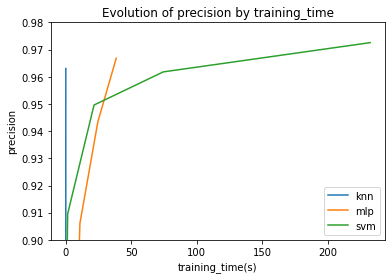

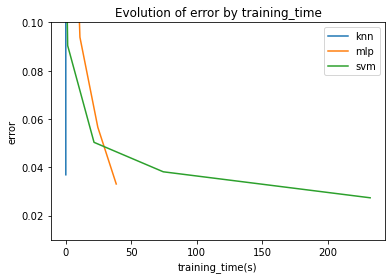

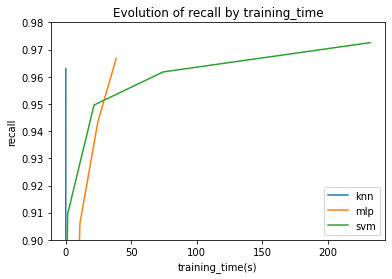

In [21]:
plt.plot(training_time_knn, precisions_knn, label="knn")
plt.plot(training_time_mlp, precisions_mlp, label="mlp")
plt.plot(training_time_svm, precisions_svm, label="svm")

plt.xlabel('training_time(s)')
plt.ylabel('precision')
plt.title('Evolution of precision by training_time')
plt.ylim([0.90,0.98])
plt.legend()
plt.show()

plt.plot(training_time_knn, errors_knn, label="knn")
plt.plot(training_time_mlp, errors_mlp, label="mlp")
plt.plot(training_time_svm, errors_svm, label="svm")

plt.xlabel('training_time(s)')
plt.ylabel('error')
plt.title('Evolution of error by training_time')
plt.ylim([0.01,0.1])
plt.legend()
plt.show()

plt.plot(training_time_knn, recalls_knn, label="knn")
plt.plot(training_time_mlp, recalls_mlp, label="mlp")
plt.plot(training_time_svm, recalls_svm, label="svm")

plt.xlabel('training_time(s)')
plt.ylabel('recall')
plt.title('Evolution of recall by training_time')
plt.ylim([0.90,0.98])
plt.legend()
plt.show()
